# Práce s daty
1. Zobrazení grafu s četnostmi žánrů her mezi lety 1990 (včetně) a 2000 (vyjma).
2. Nalezení korelačního koeficientu mezi prodeji v NA a EU.
3. Zobrazení v grafu korelačního koeficientu (NA vs. EU) v jednotlivých letech od roku 1985 po rok 2010.
4. Nalezení statistických údajů rozdílu v prodejích NA a EU pro žánr "Sports" (minimum, maximum, průměr, směrodatná odchylka) + u minima a maxima uvedení daných her.
5. Zobrazení tabulky s počtem všech prodaných kopií daného žánru her mezi lety 1980 (včetně) a 2015 (včetně).
6. Zobrazení grafu s počtem všech prodaných kopií her na daných regionálních trzích v jednotlivých letech od roku 1980 po rok 2015.
7. Zobrazení tabulky nejúspěšnějších vydavatelů podle počtu prodaných kopií a určení jejich specializace na žánry.
8. Zobrazení tabulky zlaté éry jednotlivých žánrů.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("vgsales.csv")


## 1. Zobrazení grafu s četnostmi žánrů her mezi lety 1990 (včetně) a 2000 (vyjma)


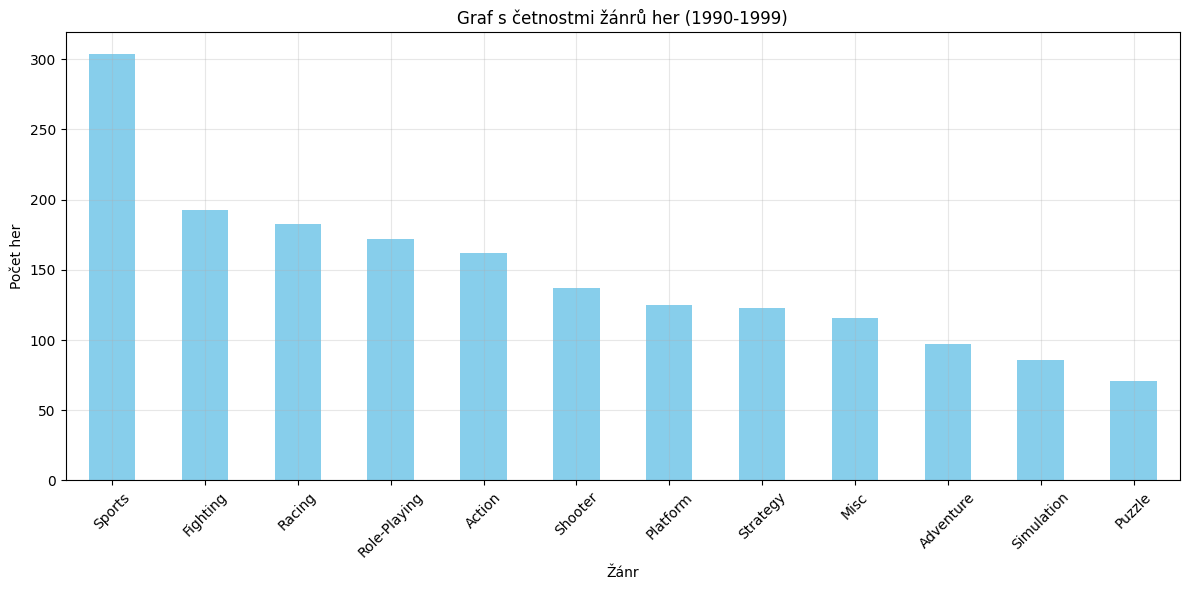

In [2]:
df_filtered = df[(df["Year"] >= 1990) & (df["Year"] < 2000)]
genre_counts = df_filtered["Genre"].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind="bar", color="skyblue")
plt.title("Graf s četnostmi žánrů her (1990-1999)")
plt.xlabel("Žánr")
plt.ylabel("Počet her")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 2. Nalezení korelačního koeficientu mezi prodeji v NA a EU


In [3]:
correlation = df["NA_Sales"].corr(df["EU_Sales"])
print(f"Korelační koeficient mezi prodeji v NA a EU: {correlation:.6f}")


Korelační koeficient mezi prodeji v NA a EU: 0.767727


## 3. Zobrazení v grafu korelačního koeficientu (NA vs. EU) v jednotlivých letech od roku 1985 po rok 2010


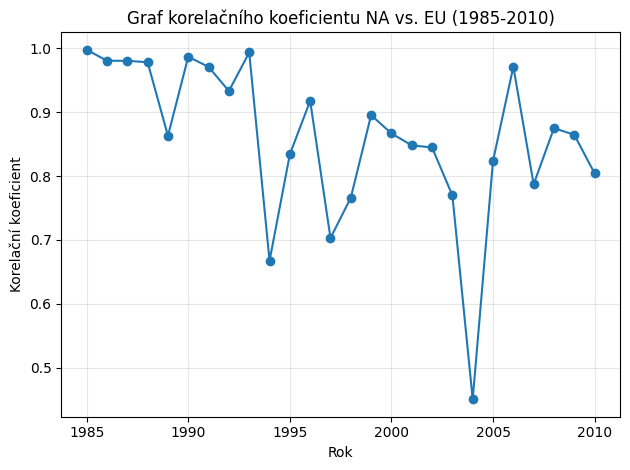

In [4]:
years_corr = []

for year in range(1985, 2011):
    year_data = df[df["Year"] == year]
    if len(year_data) > 1:
        corr = year_data["NA_Sales"].corr(year_data["EU_Sales"])
        if not pd.isna(corr):
            years_corr.append({"Year": year, "Correlation": corr})

corr_df = pd.DataFrame(years_corr)

plt.plot(corr_df["Year"], corr_df["Correlation"], marker="o")
plt.title("Graf korelačního koeficientu NA vs. EU (1985-2010)")
plt.xlabel("Rok")
plt.ylabel("Korelační koeficient")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Nalezení statistických údajů rozdílu v prodejích NA a EU pro žánr "Sports" (minimum, maximum, průměr, směrodatná odchylka) + u minima a maxima uvedení daných her


In [5]:
sports_df = df[df['Genre'] == 'Sports'].copy()
sports_df['NA_EU_Diff'] = sports_df['NA_Sales'] - sports_df['EU_Sales']

min_diff = sports_df['NA_EU_Diff'].min()
min_game = sports_df.loc[sports_df['NA_EU_Diff'].idxmin()]
max_diff = sports_df['NA_EU_Diff'].max()
max_game = sports_df.loc[sports_df['NA_EU_Diff'].idxmax()]
mean_diff = sports_df['NA_EU_Diff'].mean()
std_diff = sports_df['NA_EU_Diff'].std()

print("Základní statistické údaje rozdílu v prodejích NA a EU pro žánr 'Sports':")
print(f"Minimum: {min_diff:.2f} ({min_game['Name']})")
print(f"Maximum: {max_diff:.2f} ({max_game['Name']})")
print(f"Průměr: {mean_diff:.6f}")
print(f"Směrodatná odchylka: {std_diff:.6f}")


Základní statistické údaje rozdílu v prodejích NA a EU pro žánr 'Sports':
Minimum: -4.95 (FIFA 16)
Maximum: 12.47 (Wii Sports)
Průměr: 0.130648
Směrodatná odchylka: 0.548157


## 5. Zobrazení tabulky s počtem všech prodaných kopií daného žánru her mezi lety 1980 (včetně) a 2015 (včetně)


In [6]:
df_filtered = df[(df['Year'] >= 1980) & (df['Year'] <= 2015)]

genre_sales_table = df_filtered.groupby('Genre')['Global_Sales'].sum().reset_index()
genre_sales_table.columns = ['Žánr', 'Celkové prodeje (v milionech)']
genre_sales_table = genre_sales_table.sort_values('Celkové prodeje (v milionech)', ascending=False)

print("Tabulka s počtem všech prodaných kopií daného žánru her (1980-2015):")
display(genre_sales_table)


Tabulka s počtem všech prodaných kopií daného žánru her (1980-2015):


,Žánr,Celkové prodeje (v milionech)
0,Action,1702.96
10,Sports,1294.64
8,Shooter,1007.98
7,Role-Playing,917.04
4,Platform,827.08
3,Misc,796.45
6,Racing,725.13
2,Fighting,440.19
9,Simulation,389.48
5,Puzzle,242.22


## 6. Zobrazení grafu s počtem všech prodaných kopií her na daných regionálních trzích v jednotlivých letech od roku 1980 po rok 2015


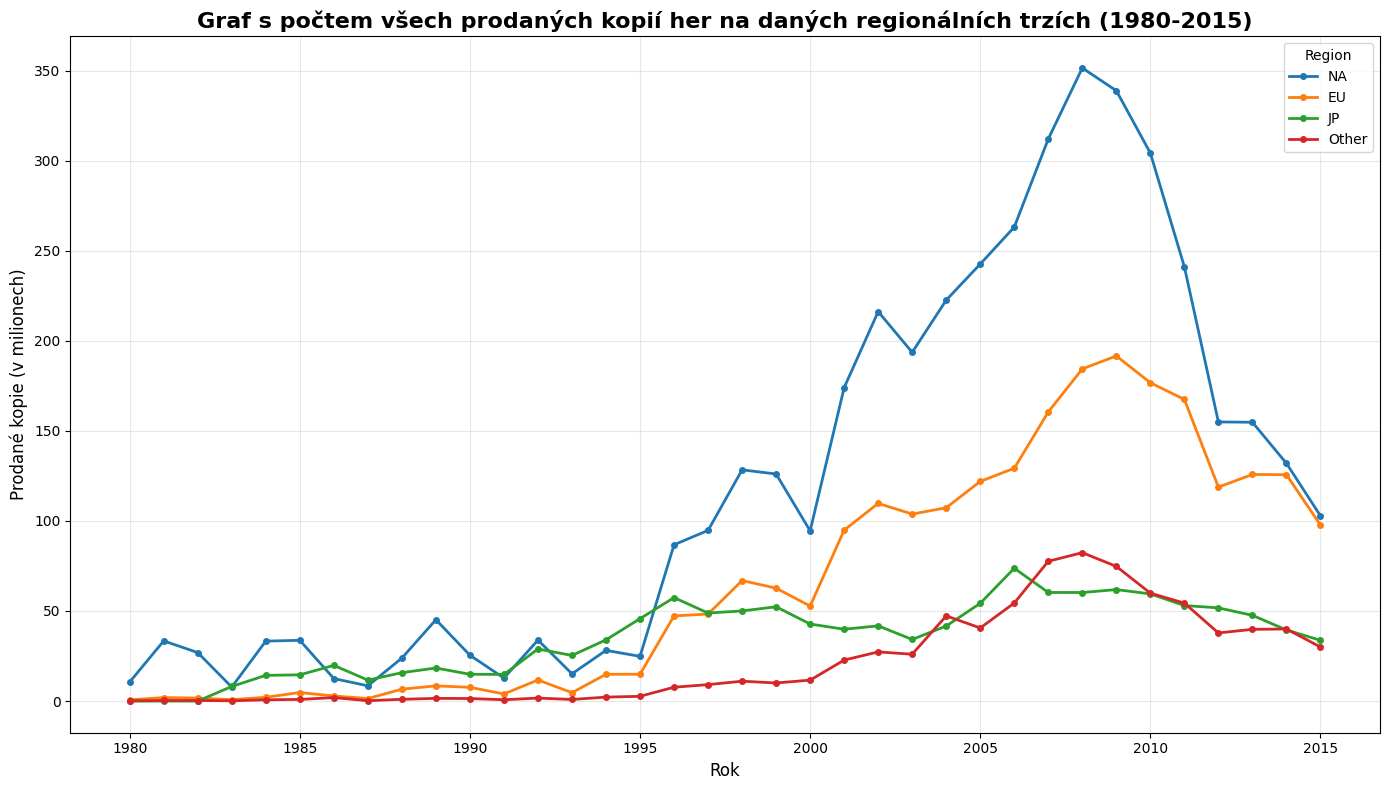

In [7]:
df_regions_time = df[(df['Year'] >= 1980) & (df['Year'] <= 2015)].copy()

region_year_sales = df_regions_time.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(14, 8))
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for region, color in zip(regions, colors):
    plt.plot(region_year_sales.index, region_year_sales[region],
             marker='o', linewidth=2, markersize=4, color=color, label=region.replace('_Sales', ''))

plt.title('Graf s počtem všech prodaných kopií her na daných regionálních trzích (1980-2015)', fontsize=16, fontweight='bold')
plt.xlabel('Rok', fontsize=12)
plt.ylabel('Prodané kopie (v milionech)', fontsize=12)
plt.legend(title='Region')
plt.grid(True, alpha=0.3)
plt.xticks(range(1980, 2016, 5))
plt.tight_layout()
plt.show()


## 7. Zobrazení tabulky nejúspěšnějších vydavatelů podle počtu prodaných kopií a určení jejich specializace na žánry


In [8]:
top_publishers = (df.groupby('Publisher')['Global_Sales'].sum().nlargest(25).reset_index().rename(columns={'Publisher':'Vydavatel', 'Global_Sales':'Celkové prodeje (v milionech)'}))
publisher_genre = df.groupby(['Publisher','Genre'])['Global_Sales'].sum().reset_index()
publisher_genre = publisher_genre.sort_values(['Publisher','Global_Sales'], ascending=[True, False])

main_genres = []

for pub in top_publishers['Vydavatel']:
    sub = publisher_genre[publisher_genre['Publisher'] == pub]
    if not sub.empty:
        main_genres.append({
            'Vydavatel': pub,
            'Hlavní žánr': sub.iloc[0]['Genre'],
            'Prodej v žánru (v milionech)': sub.iloc[0]['Global_Sales']
        })

main_genres_df = pd.DataFrame(main_genres)

result = top_publishers.merge(main_genres_df, on='Vydavatel')
result['Podíl hlavního žánru (%)'] = result['Prodej v žánru (v milionech)'] / result['Celkové prodeje (v milionech)'] * 100

print("\nTabulka nejúspěšnějších vydavatelů a jejich žánrové specializace:")
display(result.round(2))



Tabulka nejúspěšnějších vydavatelů a jejich žánrové specializace:


,Vydavatel,Celkové prodeje (v milionech),Hlavní žánr,Prodej v žánru (v milionech),Podíl hlavního žánru (%)
0,Nintendo,1786.56,Platform,427.21,23.91
1,Electronic Arts,1110.32,Sports,479.67,43.20
2,Activision,727.46,Shooter,299.87,41.22
3,Sony Computer Entertainment,607.50,Racing,110.57,18.20
4,Ubisoft,474.72,Action,142.94,30.11
5,Take-Two Interactive,399.54,Action,211.08,52.83
6,THQ,340.77,Action,89.23,26.18
7,Konami Digital Entertainment,283.64,Sports,98.95,34.89
8,Sega,272.99,Sports,71.71,26.27
9,Namco Bandai Games,254.09,Fighting,61.22,24.09


## 8. Zobrazení tabulky zlaté éry jednotlivých žánrů


In [9]:
genre_year_sales = df.groupby(['Genre', 'Year'])['Global_Sales'].sum().reset_index()

golden_eras = []

for genre in genre_year_sales['Genre'].unique():
    genre_data = genre_year_sales[genre_year_sales['Genre'] == genre]
    max_sales_year = genre_data.loc[genre_data['Global_Sales'].idxmax()]
    golden_eras.append({
        'Žánr': genre,
        'Rok zlaté éry': int(max_sales_year['Year']),
        'Celkové prodeje v zlaté éře (v milionech)': round(max_sales_year['Global_Sales'], 2)
    })

golden_eras_df = pd.DataFrame(golden_eras)
golden_eras_df = golden_eras_df.sort_values('Celkové prodeje v zlaté éře (v milionech)', ascending=False)

print("Tabulka zlaté éry jednotlivých žánrů:")
display(golden_eras_df)


Tabulka zlaté éry jednotlivých žánrů:


,Žánr,Rok zlaté éry,Celkové prodeje v zlaté éře (v milionech)
0,Action,2009,139.36
10,Sports,2009,138.52
8,Shooter,2011,99.36
3,Misc,2010,96.86
6,Racing,2008,70.66
7,Role-Playing,2010,70.52
4,Platform,2006,49.80
9,Simulation,2005,49.27
5,Puzzle,1989,37.75
2,Fighting,2008,35.38
